In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
titanic = pd.read_csv("//content//osn.csv")
titanic.head()

,Unnamed: 0,Nama Peserta,Gender,Sekolah,Provinsi,Kab/Kota,Bidang,Jenjang Lomba,Jenjang Sekolah,Kelas,Medali,Prize Tambahan,Tahun
0,0,Gangsar Lintas Damai,L,MA Amanatul Ummah,Jawa Timur,Kota Surabaya,Biologi,SMA,SMA,11.0,Partisipan,NaN,2016
1,1,Muhammad Khairul Ihsan,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Partisipan,NaN,2021
2,2,Farhannur,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Ekonomi,SMA,SMA,11.0,Emas,NaN,2022
3,3,Muhammad Fathoni,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Fisika,SMA,SMA,11.0,Partisipan,NaN,2022
4,4,Rahmat MI,L,MAN 1 Banda Aceh,Aceh,Kota Banda Aceh,Kimia,SMA,SMA,11.0,Partisipan,NaN,2022


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19327 entries, 0 to 19326
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19327 non-null  int64  
 1   Nama Peserta     19327 non-null  object 
 2   Gender           19327 non-null  object 
 3   Sekolah          19327 non-null  object 
 4   Provinsi         19327 non-null  object 
 5   Kab/Kota         19327 non-null  object 
 6   Bidang           19327 non-null  object 
 7   Jenjang Lomba    19327 non-null  object 
 8   Jenjang Sekolah  19327 non-null  object 
 9   Kelas            14852 non-null  float64
 10  Medali           19327 non-null  object 
 11  Prize Tambahan   221 non-null    object 
 12  Tahun            19327 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [ ]:
titanic.shape

(19327, 13)

In [ ]:
total = titanic.isnull().sum().sort_values(ascending=False)
total

,0
Prize Tambahan,19106
Kelas,4475
Unnamed: 0,0
Nama Peserta,0
Gender,0
Sekolah,0
Provinsi,0
Kab/Kota,0
Bidang,0
Jenjang Lomba,0


In [ ]:
import pandas as pd

# Baca data dari file CSV
df = pd.read_csv("//content//osn.csv")

# Hitung jumlah total peserta berdasarkan gender
total_L = df[df['Gender'] == 'L'].shape[0]
total_P = df[df['Gender'] == 'P'].shape[0]

# Hitung jumlah peserta yang mendapatkan medali (Emas, Perak, atau Perunggu)
medali_L = df[(df['Gender'] == 'L') & (df['Medali'].isin(['Emas', 'Perak', 'Perunggu']))].shape[0]
medali_P = df[(df['Gender'] == 'P') & (df['Medali'].isin(['Emas', 'Perak', 'Perunggu']))].shape[0]

# Hitung persentase
persentase_L = (medali_L / total_L) * 100
persentase_P = (medali_P / total_P) * 100

# Tampilkan hasil
print(f"Persentase peserta dengan gender L yang mendapatkan medali (Emas, Perak, atau Perunggu): {persentase_L:.2f}%")
print(f"Persentase peserta dengan gender P yang mendapatkan medali (Emas, Perak, atau Perunggu): {persentase_P:.2f}%")

Persentase peserta dengan gender L yang mendapatkan medali (Emas, Perak, atau Perunggu): 33.69%
Persentase peserta dengan gender P yang mendapatkan medali (Emas, Perak, atau Perunggu): 21.96%


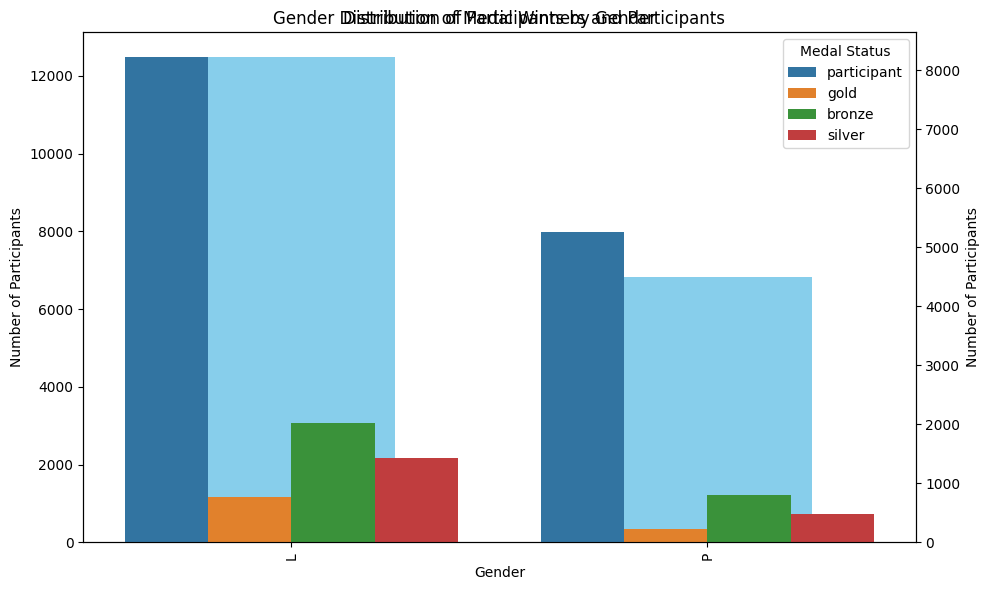

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a CSV file named 'participants.csv'
data_path = "//content//osn.csv"

# Read the data from the CSV file
df = pd.read_csv("//content//osn.csv")

# Check if 'Medali' (Medal) column exists and remap labels if necessary (assuming 'Medali' contains survival information)
if 'Medali' in df.columns and df['Medali'].dtype == object:
    survival_mapping = {'Partisipan': 'participant', 'Emas': 'gold', 'Perak': 'silver', 'Perunggu': 'bronze'}
    df['Medali'] = df['Medali'].map(survival_mapping)

# Analyze sex distribution (assuming 'Gender' is the sex column)
sex_counts = df['Gender'].value_counts()  # Count occurrences of each sex
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure with appropriate size

# Plot sex distribution as a bar chart
sex_counts.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title("Distribution of Participants by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Number of Participants")

# Analyze sex and medal distribution (assuming 'Medali' represents medals)
if 'Medali' in df.columns:
    sns.countplot(x='Gender', hue='Medali', data=df, ax=plt.twinx())  # Create twin axes
    plt.title("Gender Distribution of Medal Winners and Participants")
else:
    print("Medali column not found in data. Skipping medal analysis.")

plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.legend(title='Medal Status' if 'Medali' in df.columns else 'Participation Status')
# Display the plots
plt.tight_layout()  # Adjust spacing between plots
plt.show()

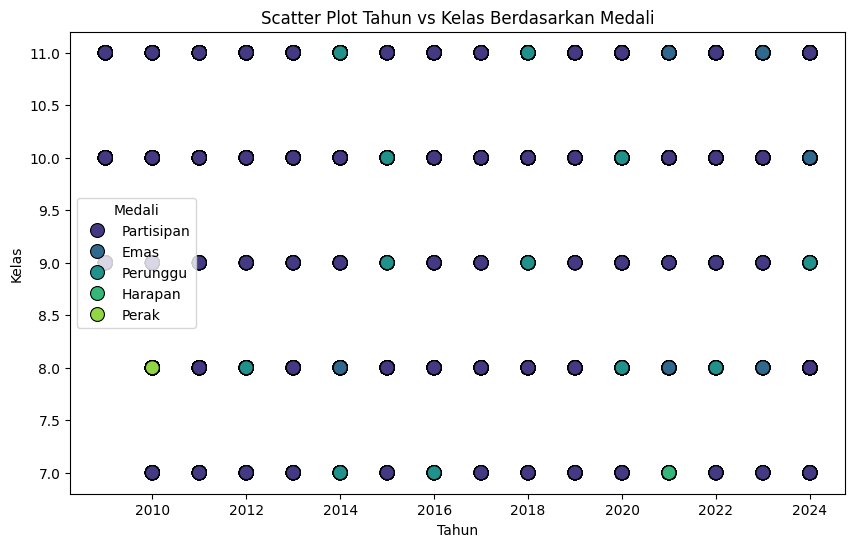

In [ ]:
# Memasukkan dataset
file_path = '/content/osn.csv'
data = pd.read_csv(file_path)

# Setting up the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with 'Tahun' on the x-axis, 'Kelas' on the y-axis, and color representing 'Medali'
sns.scatterplot(data=data, x='Tahun', y='Kelas', hue='Medali', palette='viridis', s=100, edgecolor='k')

# Menambahkan label dan judul plot
plt.xlabel('Tahun')
plt.ylabel('Kelas')
plt.title('Scatter Plot Tahun vs Kelas Berdasarkan Medali')

# Menampilkan plot
plt.show()


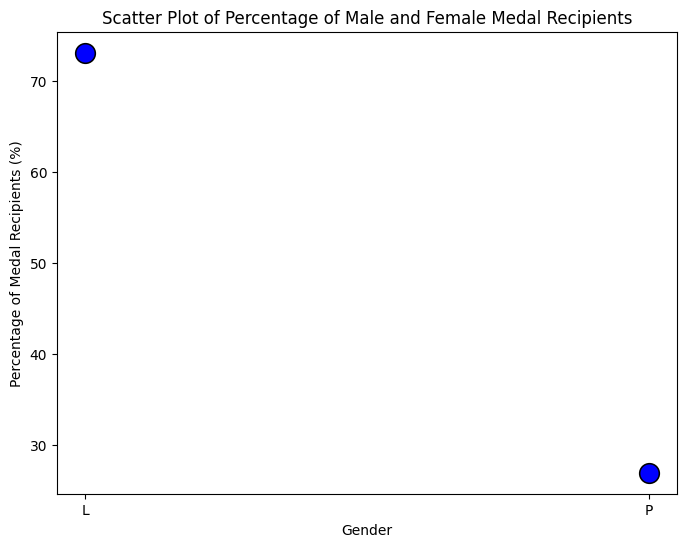

In [ ]:
# Memasukkan dataset
file_path = '/content/osn.csv'
data = pd.read_csv(file_path)

# Filter hanya peserta yang mendapat medali (tidak termasuk 'Partisipan')
medal_data = data[data['Medali'] != 'Partisipan']

# Hitung persentase penerima medali berdasarkan jenis kelamin
gender_medal_percentage = medal_data['Gender'].value_counts(normalize=True) * 100
gender_medal_df = gender_medal_percentage.reset_index()
gender_medal_df.columns = ['Gender', 'Percentage']

# Membuat scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=gender_medal_df, x='Gender', y='Percentage', s=200, color='blue', edgecolor='k')

# Menambahkan label dan judul
plt.xlabel('Gender')
plt.ylabel('Percentage of Medal Recipients (%)')
plt.title('Scatter Plot of Percentage of Male and Female Medal Recipients')

# Menampilkan plot
plt.show()

<Axes: xlabel='Jenjang Sekolah', ylabel='count'>

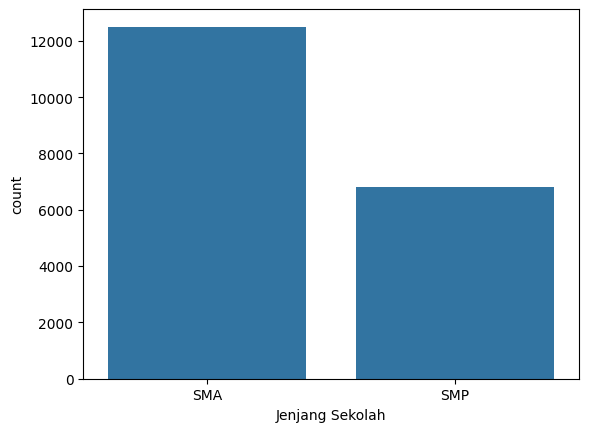

In [ ]:
import seaborn as sns
import pandas as pd

# Memasukkan dataset
file_path = ('/content/osn.csv')
data = pd.read_csv(file_path)
# Asumsikan data Anda sudah disimpan dalam DataFrame bernama 'data'
sns.countplot(x='Jenjang Sekolah', data=data)

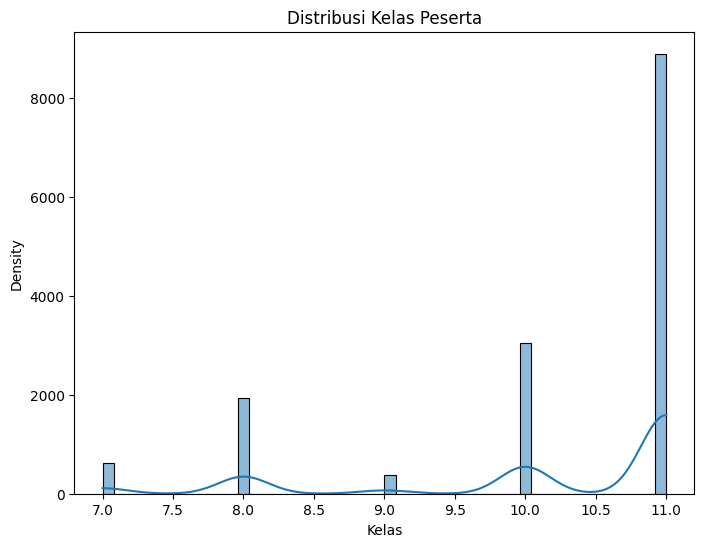

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of 'Kelas' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Kelas'].dropna(), kde=True)  # Replaced `sns.distplot` with `sns.histplot` since `distplot` is deprecated
plt.title("Distribusi Kelas Peserta")
plt.xlabel("Kelas")
plt.ylabel("Density")
plt.show()


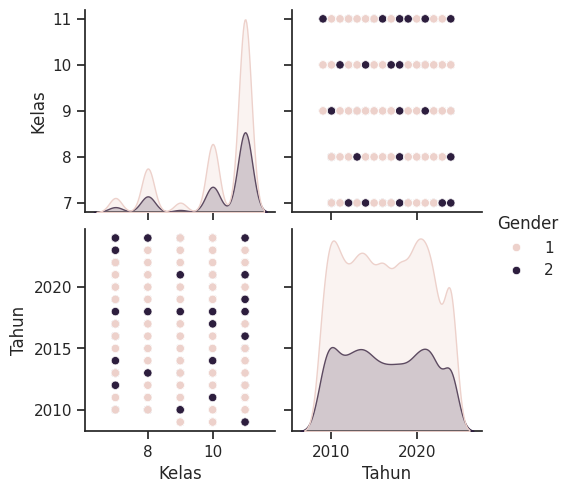

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load and prepare the data
file_path = '/content/osn.csv'
data = pd.read_csv(file_path)

# Mapping categorical columns for pairplot compatibility
data['Gender'] = data['Gender'].map({"L": 1, "P": 2})
data['Medali'] = data['Medali'].map({"Emas": 3, "Perak": 2, "Perunggu": 1, "Partisipan": 0})

# Convert 'Kelas' and 'Tahun' to numeric values, drop rows with NaNs
data['Kelas'] = pd.to_numeric(data['Kelas'], errors='coerce')
data['Tahun'] = pd.to_numeric(data['Tahun'], errors='coerce')
data_cleaned = data.dropna(subset=['Kelas', 'Tahun', 'Gender'])

# Set style for the plot
sns.set(style="ticks", color_codes=True)

# Create pairplot with kde on the diagonal
pairplot = sns.pairplot(data_cleaned, vars=['Kelas', 'Tahun'], hue="Gender", diag_kind="kde")

# Display the plot
plt.show()


In [ ]:
# Import library
import pandas as pd

# Load data
file_path = '/content/osn.csv'
data = pd.read_csv(file_path)

# Mapping categorical columns
data['Gender'] = data['Gender'].map({"L": 1, "P": 2})
data['Medali'] = data['Medali'].map({"Emas": 3, "Perak": 2, "Perunggu": 1, "Partisipan": 0})

# Dropping non-numeric columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr(method='pearson')

# Display correlation matrix
correlation_matrix


,Unnamed: 0,Gender,Kelas,Medali,Tahun
Unnamed: 0,1.000000,0.114339,-0.638165,-0.097973,0.018318
Gender,0.114339,1.000000,0.030083,-0.118740,0.043670
Kelas,-0.638165,0.030083,1.000000,-0.049743,-0.038145
Medali,-0.097973,-0.118740,-0.049743,1.000000,0.007718
Tahun,0.018318,0.043670,-0.038145,0.007718,1.000000


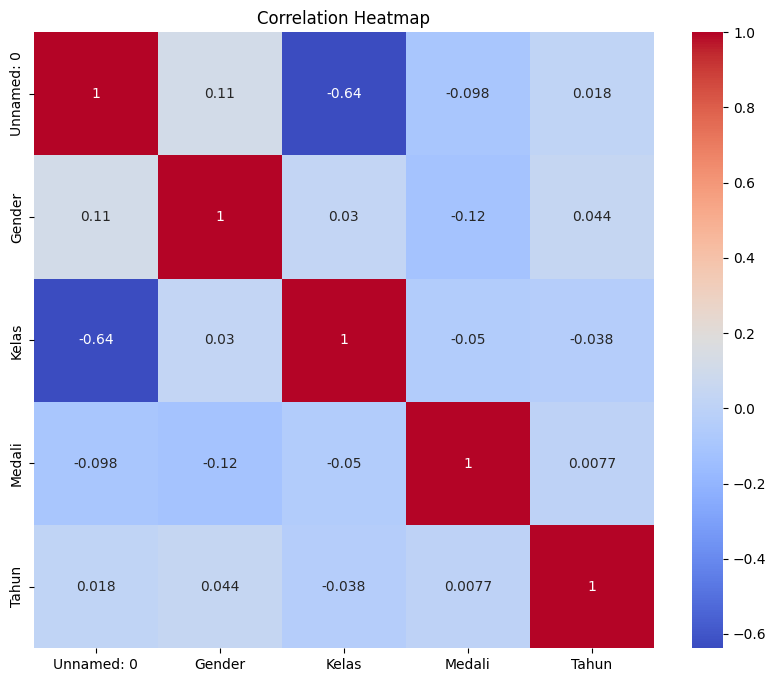

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import library
import pandas as pd

# Load data
file_path = '/content/osn.csv'
data = pd.read_csv(file_path)

# Mapping categorical columns
data['Gender'] = data['Gender'].map({"L": 1, "P": 2})
data['Medali'] = data['Medali'].map({"Emas": 3, "Perak": 2, "Perunggu": 1, "Partisipan": 0})

# Dropping non-numeric columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_data.corr(method='pearson')

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()
